In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indonesia-news-portal-headlines-dataset/indonesia_news_titles.csv
/kaggle/input/indonesia-news-portal-headlines-dataset/dataset-metadata.json


In [2]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# List all files in the input directory
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indonesia-news-portal-headlines-dataset/indonesia_news_titles.csv
/kaggle/input/indonesia-news-portal-headlines-dataset/dataset-metadata.json


In [4]:
# Load the dataset
file_path = "/kaggle/input/indonesia-news-portal-headlines-dataset/indonesia_news_titles.csv"
df = pd.read_csv(file_path)

In [5]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (1174, 3)


,source,title,date
0,CNN Indonesia,Wamendagri Sebut Dalam Waktu Dekat Ada Kepala ...,Unknown Date
1,CNN Indonesia,Kepala Daerah Awali Hari Ketiga Retret Pembeka...,Unknown Date
2,CNN Indonesia,"Lemparan Arhan Makan Korban, Bangkok United Me...",Unknown Date
3,CNN Indonesia,PSSI Resmi Pecat Indra Sjafri,Unknown Date
4,CNN Indonesia,VIDEO: Hizbullah Gelar Prosesi Pemakaman Hasan...,Unknown Date


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
source    0
title     0
date      0
dtype: int64


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

In [8]:
# Basic statistics on the date column
print("\nDate Range:", df['date'].min(), "to", df['date'].max())


Date Range: 2025-02-14 00:00:00 to 2025-02-23 00:00:00


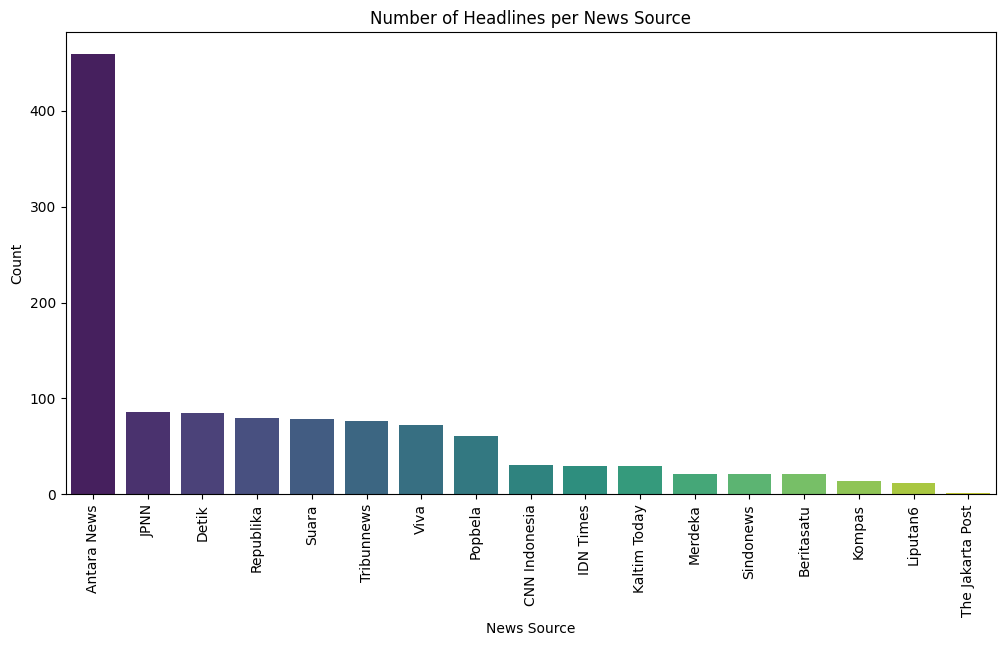

In [9]:
# Count headlines per source
source_counts = df['source'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Headlines per News Source")
plt.xlabel("News Source")
plt.ylabel("Count")
plt.show()

In [10]:
# Display the most common words in headlines
from collections import Counter
import itertools

all_words = list(itertools.chain(*[title.split() for title in df['title'].dropna()]))
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

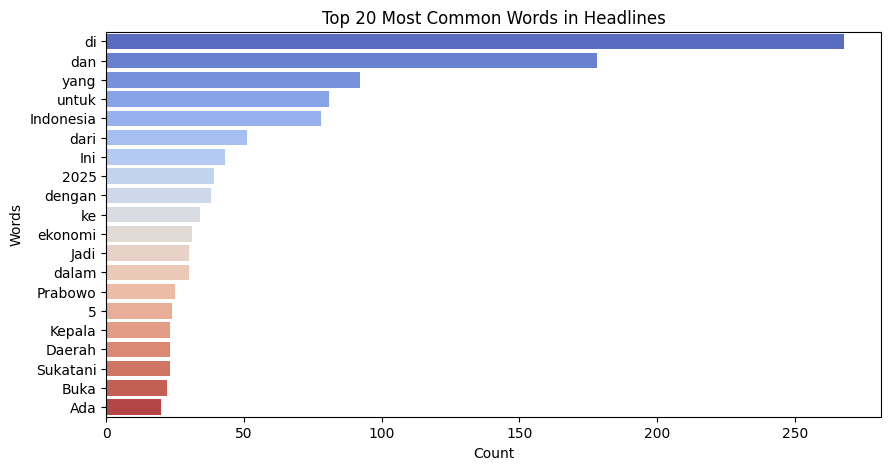

In [11]:
# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(10, 5))
sns.barplot(x=common_words_df['Count'], y=common_words_df['Word'], palette="coolwarm")
plt.title("Top 20 Most Common Words in Headlines")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()